In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KAGGLE_USERNAME' ]='aabidnabitantry'
os.environ['KAGGLE_KEY']='5a631a8ee310752e3cd294d9b84be216'

In [3]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 95% 197M/207M [00:02<00:00, 75.6MB/s]
100% 207M/207M [00:02<00:00, 88.0MB/s]


In [4]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [5]:
main_dir ='/content/New Masks Dataset'
train_dir = os.path.join(main_dir, 'Train')
test_dir = os.path.join(main_dir, 'Test')
valid_dir = os.path.join(main_dir, 'Validation')
 
train_mask_dir = os.path.join(train_dir, 'Mask')
train_nomask_dir = os.path.join(train_dir, 'Non Mask')

In [6]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])
train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0042.jpg', '1110.jpg', '1154.jpg', '0466.jpg', '1291.jpg', '1378.jpg', '0792.jpg', '1339.jpg', '0171.jpg', '0803.jpg']
['102.jpg', '232.jpg', '247.jpg', '300.jpg', '154.jpg', '92.jpg', '203.jpg', '111.jpg', '317.jpg', '176.jpg']


['/content/New Masks Dataset/Train/Mask/0042.jpg', '/content/New Masks Dataset/Train/Mask/1110.jpg', '/content/New Masks Dataset/Train/Mask/1154.jpg', '/content/New Masks Dataset/Train/Mask/0466.jpg', '/content/New Masks Dataset/Train/Mask/1291.jpg', '/content/New Masks Dataset/Train/Mask/1378.jpg', '/content/New Masks Dataset/Train/Mask/0792.jpg', '/content/New Masks Dataset/Train/Mask/1339.jpg']
['/content/New Masks Dataset/Train/Non Mask/102.jpg']


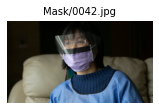

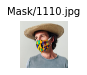

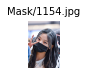

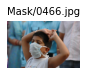

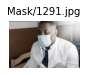

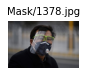

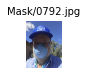

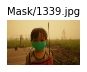

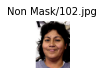

['/content/New Masks Dataset/Train/Mask/0042.jpg', '/content/New Masks Dataset/Train/Mask/1110.jpg', '/content/New Masks Dataset/Train/Mask/1154.jpg', '/content/New Masks Dataset/Train/Mask/0466.jpg', '/content/New Masks Dataset/Train/Mask/1291.jpg', '/content/New Masks Dataset/Train/Mask/1378.jpg', '/content/New Masks Dataset/Train/Mask/0792.jpg', '/content/New Masks Dataset/Train/Mask/1339.jpg']
['/content/New Masks Dataset/Train/Non Mask/102.jpg', '/content/New Masks Dataset/Train/Non Mask/232.jpg']


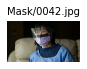

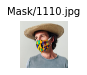

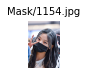

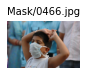

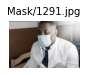

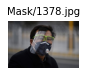

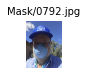

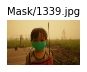

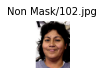

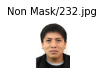

['/content/New Masks Dataset/Train/Mask/0042.jpg', '/content/New Masks Dataset/Train/Mask/1110.jpg', '/content/New Masks Dataset/Train/Mask/1154.jpg', '/content/New Masks Dataset/Train/Mask/0466.jpg', '/content/New Masks Dataset/Train/Mask/1291.jpg', '/content/New Masks Dataset/Train/Mask/1378.jpg', '/content/New Masks Dataset/Train/Mask/0792.jpg', '/content/New Masks Dataset/Train/Mask/1339.jpg']
['/content/New Masks Dataset/Train/Non Mask/102.jpg', '/content/New Masks Dataset/Train/Non Mask/232.jpg', '/content/New Masks Dataset/Train/Non Mask/247.jpg']


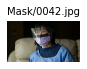

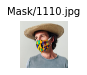

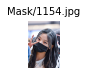

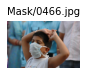

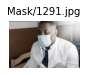

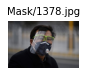

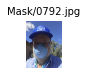

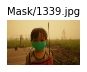

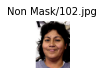

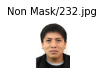

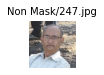

['/content/New Masks Dataset/Train/Mask/0042.jpg', '/content/New Masks Dataset/Train/Mask/1110.jpg', '/content/New Masks Dataset/Train/Mask/1154.jpg', '/content/New Masks Dataset/Train/Mask/0466.jpg', '/content/New Masks Dataset/Train/Mask/1291.jpg', '/content/New Masks Dataset/Train/Mask/1378.jpg', '/content/New Masks Dataset/Train/Mask/0792.jpg', '/content/New Masks Dataset/Train/Mask/1339.jpg']
['/content/New Masks Dataset/Train/Non Mask/102.jpg', '/content/New Masks Dataset/Train/Non Mask/232.jpg', '/content/New Masks Dataset/Train/Non Mask/247.jpg', '/content/New Masks Dataset/Train/Non Mask/300.jpg']


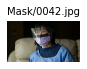

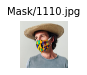

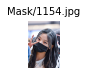

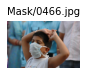

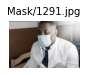

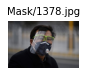

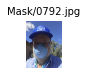

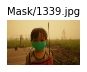

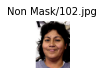

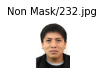

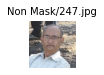

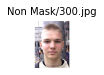

['/content/New Masks Dataset/Train/Mask/0042.jpg', '/content/New Masks Dataset/Train/Mask/1110.jpg', '/content/New Masks Dataset/Train/Mask/1154.jpg', '/content/New Masks Dataset/Train/Mask/0466.jpg', '/content/New Masks Dataset/Train/Mask/1291.jpg', '/content/New Masks Dataset/Train/Mask/1378.jpg', '/content/New Masks Dataset/Train/Mask/0792.jpg', '/content/New Masks Dataset/Train/Mask/1339.jpg']
['/content/New Masks Dataset/Train/Non Mask/102.jpg', '/content/New Masks Dataset/Train/Non Mask/232.jpg', '/content/New Masks Dataset/Train/Non Mask/247.jpg', '/content/New Masks Dataset/Train/Non Mask/300.jpg', '/content/New Masks Dataset/Train/Non Mask/154.jpg']


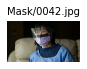

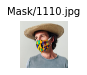

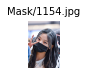

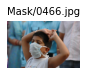

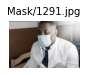

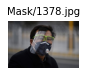

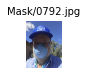

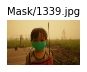

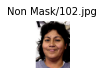

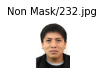

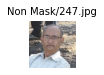

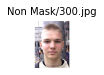

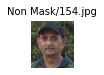

['/content/New Masks Dataset/Train/Mask/0042.jpg', '/content/New Masks Dataset/Train/Mask/1110.jpg', '/content/New Masks Dataset/Train/Mask/1154.jpg', '/content/New Masks Dataset/Train/Mask/0466.jpg', '/content/New Masks Dataset/Train/Mask/1291.jpg', '/content/New Masks Dataset/Train/Mask/1378.jpg', '/content/New Masks Dataset/Train/Mask/0792.jpg', '/content/New Masks Dataset/Train/Mask/1339.jpg']
['/content/New Masks Dataset/Train/Non Mask/102.jpg', '/content/New Masks Dataset/Train/Non Mask/232.jpg', '/content/New Masks Dataset/Train/Non Mask/247.jpg', '/content/New Masks Dataset/Train/Non Mask/300.jpg', '/content/New Masks Dataset/Train/Non Mask/154.jpg', '/content/New Masks Dataset/Train/Non Mask/92.jpg']


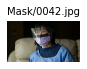

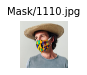

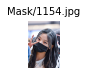

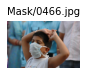

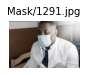

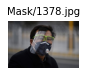

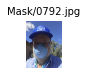

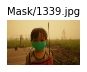

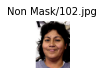

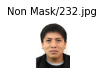

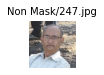

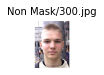

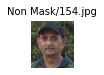

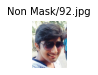

['/content/New Masks Dataset/Train/Mask/0042.jpg', '/content/New Masks Dataset/Train/Mask/1110.jpg', '/content/New Masks Dataset/Train/Mask/1154.jpg', '/content/New Masks Dataset/Train/Mask/0466.jpg', '/content/New Masks Dataset/Train/Mask/1291.jpg', '/content/New Masks Dataset/Train/Mask/1378.jpg', '/content/New Masks Dataset/Train/Mask/0792.jpg', '/content/New Masks Dataset/Train/Mask/1339.jpg']
['/content/New Masks Dataset/Train/Non Mask/102.jpg', '/content/New Masks Dataset/Train/Non Mask/232.jpg', '/content/New Masks Dataset/Train/Non Mask/247.jpg', '/content/New Masks Dataset/Train/Non Mask/300.jpg', '/content/New Masks Dataset/Train/Non Mask/154.jpg', '/content/New Masks Dataset/Train/Non Mask/92.jpg', '/content/New Masks Dataset/Train/Non Mask/203.jpg']


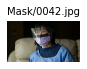

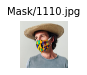

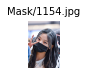

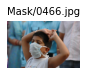

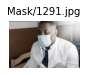

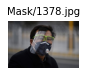

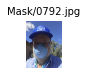

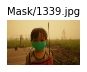

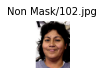

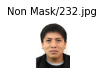

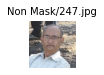

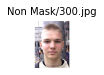

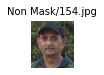

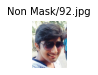

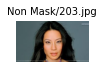

['/content/New Masks Dataset/Train/Mask/0042.jpg', '/content/New Masks Dataset/Train/Mask/1110.jpg', '/content/New Masks Dataset/Train/Mask/1154.jpg', '/content/New Masks Dataset/Train/Mask/0466.jpg', '/content/New Masks Dataset/Train/Mask/1291.jpg', '/content/New Masks Dataset/Train/Mask/1378.jpg', '/content/New Masks Dataset/Train/Mask/0792.jpg', '/content/New Masks Dataset/Train/Mask/1339.jpg']
['/content/New Masks Dataset/Train/Non Mask/102.jpg', '/content/New Masks Dataset/Train/Non Mask/232.jpg', '/content/New Masks Dataset/Train/Non Mask/247.jpg', '/content/New Masks Dataset/Train/Non Mask/300.jpg', '/content/New Masks Dataset/Train/Non Mask/154.jpg', '/content/New Masks Dataset/Train/Non Mask/92.jpg', '/content/New Masks Dataset/Train/Non Mask/203.jpg', '/content/New Masks Dataset/Train/Non Mask/111.jpg']


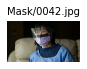

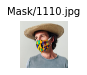

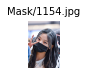

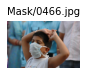

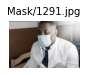

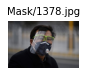

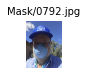

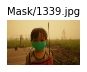

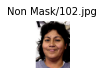

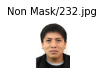

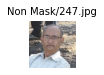

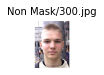

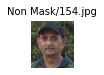

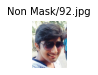

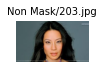

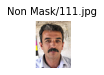

In [7]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))
 
mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))
 
  nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))
 
  print(mask_pic)
  print(nomask_pic)
 
  merged_list = mask_pic+nomask_pic
 
  for i in range(0,len(merged_list)):
    data = merged_list[i].split('/',4)[4]
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis('off')
    image = mpimg.imread(merged_list[i])
    sp.set_title(data,fontsize=10)
    plt.imshow(image,cmap='gray')
 
    plt.show()

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  zoom_range = 0.2,
                                  rotation_range = 40,
                                  horizontal_flip = True,
                                  )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size =32,                                            
                                                   class_mode = 'binary'
                                                   )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size=(150,150),
                                                   batch_size =32,                                            
                                                   class_mode = 'binary'
                                                   )
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                   target_size=(150,150),
                                                   batch_size =32,                                            
                                                   class_mode = 'binary'
                                                   )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [10]:
train_generator.image_shape

(150, 150, 3)

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.5))
 
model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
 
model.add(Flatten())
 
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [12]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 43s 614ms/step - loss: 3.4302 - accuracy: 0.5167 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 11s 592ms/step - loss: 0.6877 - accuracy: 0.5217 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 11s 590ms/step - loss: 0.6491 - accuracy: 0.6367 - val_loss: 0.6437 - val_accuracy: 0.7680
Epoch 4/30
19/19 [==============================] - 11s 593ms/step - loss: 0.4973 - accuracy: 0.7800 - val_loss: 0.4661 - val_accuracy: 0.8529
Epoch 5/30
19/19 [==============================] - 11s 589ms/step - loss: 0.4342 - accuracy: 0.8183 - val_loss: 0.5059 - val_accuracy: 0.8856
Epoch 6/30
19/19 [==============================] - 11s 596ms/step - loss: 0.3696 - accuracy: 0.8683 - val_loss: 0.3387 - val_accuracy: 0.8922
Epoch 7/30
19/19 [==============================] - 11s 594ms/step - loss: 0.3301 - accuracy: 0.8850 - val_loss: 0.3514 - val_accuracy: 0.9085

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

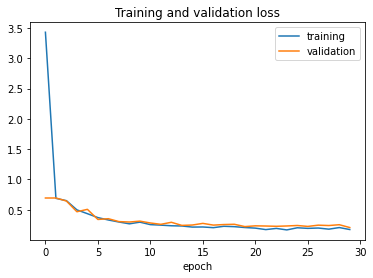

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate

Text(0.5, 0, 'epoch')

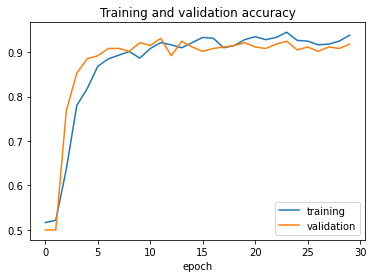

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [21]:
test_loss , test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 303ms/step - loss: 0.1575 - accuracy: 0.9700
test loss:0.15749892592430115 test acc:0.9700000286102295


In [22]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path ='/content/'+fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('mask')
  else:
    print('no mask')

Saving abc.img.jpeg to abc.img.jpeg
Saving img.jpg to img.jpg
abc.img.jpeg
mask
img.jpg
mask


In [23]:
model.save('model.h5')